# Forest Cover Type Classification

## Load Dataset 

In [2]:
import pandas as pd

dataset=pd.read_csv('covtype.data' ,sep=',' , names=["Elevation","Aspect","Slope", "Horizontal_Distance_To_Hydrology",
                                                     "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am",
                                                     "Hillshade_Noon", "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"] + 
                    [f"Wilderness_Area{i}" for i in range(1, 5)] \
                    + [f"Soil_Type{i}" for i in range(1, 41)] \
                    + ["Cover_Type"])

print(dataset.head())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

## Preprocessing

### Cleaning 

In [4]:
#Checking Missing values
print(dataset.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Train , Test / Split

In [8]:
X=dataset.drop('Cover_Type' , axis=1)
y=dataset['Cover_Type']-1



In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.2 , random_state=42)


## Model LightGBM

In [10]:
from lightgbm import LGBMClassifier

lgbm_model=LGBMClassifier(objective='multiclass', num_class=7)


## Training

In [11]:
lgbm_model.fit(X_train , y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 53
[LightGBM] [Info] Start training from score -1.010055
[LightGBM] [Info] Start training from score -0.717554
[LightGBM] [Info] Start training from score -2.787067
[LightGBM] [Info] Start training from score -5.343669
[LightGBM] [Info] Start training from score -4.126990
[LightGBM] [Info] Start training from score -3.511322
[LightGBM] [Info] Start training from score -3.338569


LGBMClassifier(num_class=7, objective='multiclass')

## Evaluation

In [13]:
lgbm_y_pred=lgbm_model.predict(X_test)


## Accuracy Score

In [15]:
from sklearn.metrics import accuracy_score

print(f'Accuracy : {accuracy_score(y_test, lgbm_y_pred):.2f} ')


Accuracy : 0.85 


## Confusion Matrix

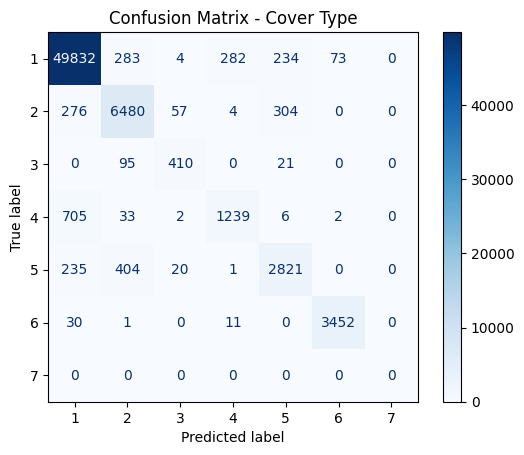

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lgbm_y_pred, labels=[1, 2, 3, 4, 5, 6, 7])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Cover Type")
plt.show()

## Feature Importance

<Figure size 500x500 with 0 Axes>

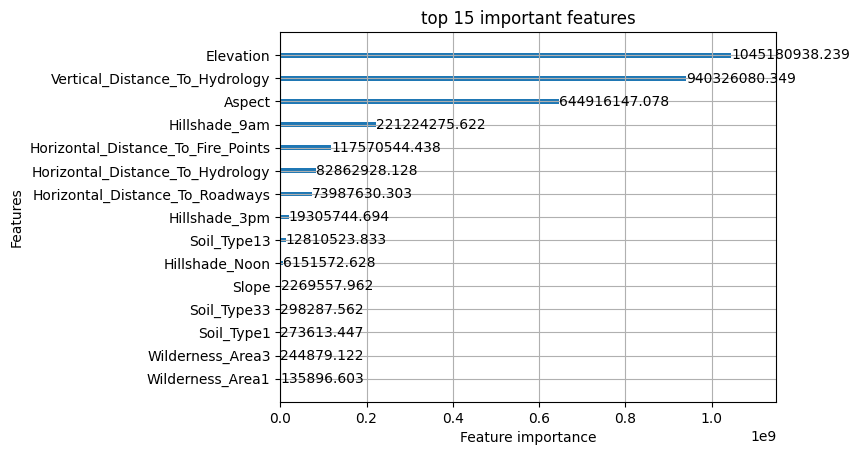

In [31]:
from lightgbm import plot_importance

plt.figure(figsize=(5,5))
plot_importance(lgbm_model , max_num_features=15 , importance_type='gain')
plt.title('top 15 important features')
plt.show()
